# Participação 6
Exercícios da seção 7

### 1. Faça os *learning checks* LC7.1 - LC7.7 propostos em [34]

(LC7.1) Why was it important to mix the bowl before we sampled the balls?
    
    R: Porque as bolas retiradas e recolocadas no topo do 
    pote podem influenciar o resultado do próximo teste com a pá.

(LC7.2) Why is it that our 33 groups of friends did not all have the same numbers of balls that were red out of 50, and hence different proportions red?

    R: Porque a pá não tem espaço para todas as bolas do pote, 
    logo é esperado que as proporções sejam diferentes a cada coleta visto 
    que cada cor de bola tem uma probabilidade de ser sorteada, 
    possibilitando diferentes valores de cada tipo.
    Portanto, fazer várias coletas possiblitam uma melhor visão da 
    proporção de cores das bolas visto que a tendência é sortear 
    mais vezes (a moda), a quantidade de bolas vermelhas na pá 
    proporcional a quantidade de bolas vermelhas no pote.

(LC7.3) Why couldn’t we study the effects of sampling variation when we used the virtual shovel only once? Why did we need to take more than one virtual sample (in our case 33 virtual samples)?
    
    R: Porque cada uso da função "rep_sample_n()" sorteia aleatóriamente, 
    fazendo com que as bolas sorteadas, e portanto proporção de 
    bolas vermelhas sampleadas, variem a cada uso.

(LC7.4) Why did we not take 1000 “tactile” samples of 50 balls by hand?

    R: Porque seria muito trabalhoso fazer 1000 amostras a mão.

(LC7.5) Looking at Figure 7.10, would you say that sampling 50 balls where 30% of them were red is likely or not? What about sampling 50 balls where 10% of them were red?

    R: Olhando para a figura 7.10, é possível dizer que é provável 
    que cerca de 20% das amostragens com 50 bolas terá 30% de bolas vermelhas. 
    Similarmente menos de 1% das amostragens terão 
    menos de 10% de bolas vermelhas (nem aparece no gráfico).

(LC7.6) In Figure 7.12, we used shovels to take 1000 samples each, computed the resulting 1000 proportions of the shovel’s balls that were red, and then visualized the distribution of these 1000 proportions in a histogram. We did this for shovels with 25, 50, and 100 slots in them. As the size of the shovels increased, the histograms got narrower. In other words, as the size of the shovels increased from 25 to 50 to 100, did the 1000 proportions

A. vary less,

B. vary by the same amount, or

C. vary more?

    R: A. variaram, menos. Isso também pode ser observado 
    pelo valor de desvio padrão para as amostragens com 100 pás.

(LC7.7) What summary statistic did we use to quantify how much the 1000 proportions red varied?

A. The interquartile range

B. The standard deviation

C. The range: the largest value minus the smallest.

    R: B. O desvio padrão. basicamente esse valor mostra 
    o quanto os valores obtidos desviam do padrão das amostragens.

DUVIDA MINHA: Existe alguma métrica sobre em qual quantidade e quantas vezes a amostra deve ser sampleada com base no número de elementos?

### 2. Após revisar a Seção 14.9 em [65], descreva, em uma sentença, um equívoco comum associado à Lei dos Números Grandes.

    R: A lei dos números grandes diz que o desvio padrão é inversamente 
    proporcional ao número de amostragens tiradas, logo com um grande 
    número de amostragem o desvio padrão pode chegar a ser insignificante. 
    Porém, um equívoco comum associado a essa lei, é o de acreditar que, 
    como os resultados tendem a se equilibrar em uma média dado 
    amostragens o suficiente, um resultado abaixo do padrão esperado 
    significa maior chance de que a próxima amostragem tenha um resultado 
    acima do padrão esperado e vice-versa, mesmo as chances permanecendo 
    as mesma e amostragens não interferindo no resultado umas das outras.

### 3. Qual é a probabilidade teórica e empírica da ocorrência do evento (cara, coroa, cara) ao lançarmos simultaneamente três moedas? Realize simulações de Monte Carlo para comparar os resultados obtidos por ambas as abordagens. Dica: A probabilidade teórica de ocorrência do evento (cara, coroa, cara) ao lançar simultaneamente três moedas pode ser calculada utilizando o princípio da multiplicação para eventos independentes. Cada lançamento é independente e a probabilidade de obter cara/coroa em cada moeda justa é 0.5.

    R: Como a probabilidade de cada resultado de cara e coroa é 0.5, 
    a chance de obter qualquer combinação específica de 3 resultados, 
    incluindo cara, coroa, cara, é de 0.5*0.5*0.5, ou seja, 0.125.

In [56]:
import random
from plotnine import *
import pandas as pd

def coin_toss():
  """Simulates a single coin toss and returns "H" for heads or "T" for tails."""
  if random.random() < 0.5:
    return "H"
  else:
    return "T"

def simulate_three_tosses(num_simulations):
    """
    Simulates three coin tosses for num_simulations times and returns a dictionary
    containing counts for each outcome (HHH, HHT, etc.).
    """
    results = {"HHH": 0, "HHT": 0, "HTH": 0, "THH": 0,
                "HTT": 0, "THT": 0, "TTH": 0, "TTT": 0}
    outcomes = []
    for _ in range(num_simulations):
        toss1 = coin_toss()
        toss2 = coin_toss()
        toss3 = coin_toss()
        outcome = toss1 + toss2 + toss3
        outcomes.append(outcome)

    df = pd.DataFrame(outcomes, columns=['Outcome'])

    return df

# Example usage
num_simulations = 1000000
df = simulate_three_tosses(num_simulations)



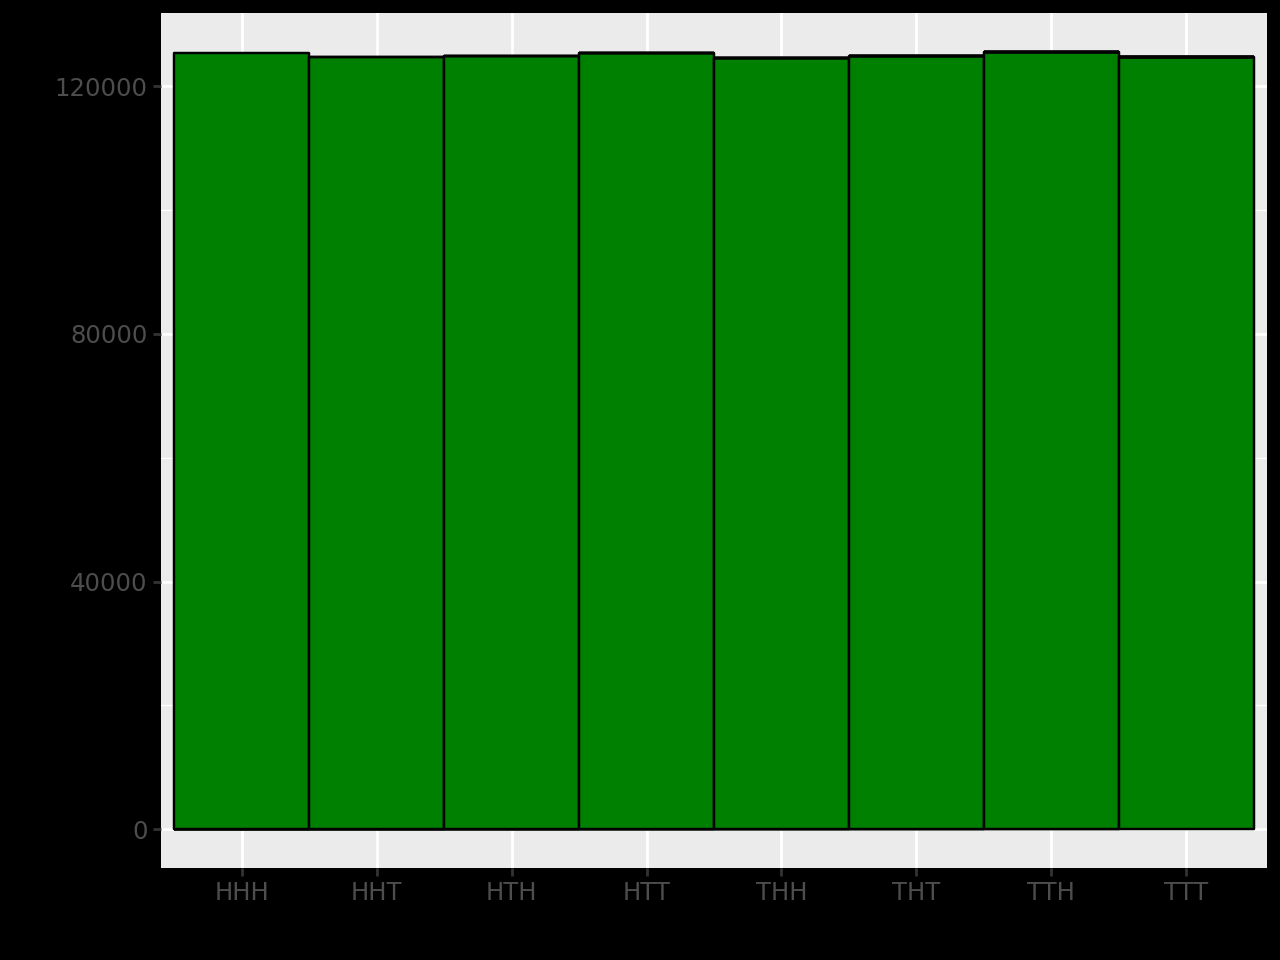

In [57]:
ggplot(df) \
+ aes(x="Outcome") \
+ geom_histogram(binwidth=1, fill="green", color="black")


In [58]:
outcome_counts = df['Outcome'].value_counts()
df = pd.merge(df,outcome_counts, on="Outcome", how="left")
df = df.drop_duplicates()
df["probability"] = df["count"]/num_simulations
df

,Outcome,count,probability
0,HTH,124844,0.124844
1,TTT,124747,0.124747
2,HHT,124733,0.124733
3,HHH,125376,0.125376
6,TTH,125564,0.125564
7,THH,124546,0.124546
8,THT,124809,0.124809
22,HTT,125381,0.125381


### 4. O problema de Monty Hall e o problema dos aniversários são frequentemente estudados em contextos de teoria das probabilidades devido à sua natureza intrigante e contraintuitiva, que desafia a intuição inicial. Ambos os problemas envolvem situações em que a probabilidade aparente de um evento pode ser enganosa e contraintuitiva, levando muitas pessoas a tirarem conclusões incorretas. Leia a Seção 13.7 em [65] para explorar os dois problemas, e descubra como esses desafios podem ser abordados empiricamente usando a técnica de Monte Carlo. Para verificar se os resultados das simulações (stick, switch e results) seguem uma distribuição normal, faça um histograma e um gráfico quantil-quantil (QQ-plot) com a distribuição normal para cada resultado. Use a função ggplot.


In [59]:
import pandas as pd
import numpy as np
from plotnine import *

In [296]:
B = 10000

def mounty_hall(estrategia):
    doors = np.arange(1,4)
    prize = np.array(("car","goat","goat"))
    prize_door = doors[prize == "car"]
    my_pick = np.random.choice(doors,1)
    show = np.random.choice(doors[~np.in1d(doors, [my_pick[0],prize_door[0]])],1)
    stick = my_pick
    stick == prize_door
    switch = doors[~np.in1d(doors, [my_pick[0], show[0]])]
    if estrategia == "stick":
        choice = stick
    else:
        choice = switch
    return choice == prize_door

In [297]:
print(mounty_hall("stick"))
print(mounty_hall("switch"))

[ True]
[ True]


In [298]:
def simulate_strategy(estrategia, num_simulations):
    count_true = 0
    for _ in range(num_simulations):
        if mounty_hall(estrategia):
            count_true += 1
    return count_true/ num_simulations

In [310]:
print(f"Mantendo a primeira escolha: {simulate_strategy('stick',1000)}")
print(f"Trocando a primeira escolha: {simulate_strategy('switch',1000)}")

Mantendo a primeira escolha: 0.327
Trocando a primeira escolha: 0.671


In [503]:
n = 50
days = np.arange(1,366)
a = True
x = 1
c = 0
while x != 0:
    bdays = np.random.choice(days,n)
    x = bdays[pd.DataFrame(bdays).duplicated()].shape[0]
    c+=1
    if c > 50:
        break
c

# np.duplicated(bdays)

31

In [507]:
bdays = np.random.choice(days,n)
x = bdays[pd.DataFrame(bdays).duplicated()].shape[0]
x != 0

True

In [508]:
def same_bday(n):
    days = np.arange(1,366)
    bdays = np.random.choice(days,n)
    x = bdays[pd.DataFrame(bdays).duplicated()].shape[0]
    return x != 0

In [510]:
def simulate_bday(num_simulations):
    count_true = 0
    n = 50
    for _ in range(num_simulations):
        if same_bday(n):
            count_true += 1
    return count_true/ num_simulations

In [512]:
simulate_bday(10000)

0.9687

In [521]:
## graphs
def simulate_bdays_diff(n,num_simulations):
    probabilities = []
    for i in range(1,n):
        count_true = 0
        for _ in range(num_simulations):
            if same_bday(i):
                count_true += 1
        probabilities.append(count_true/ num_simulations)        
    return probabilities

In [523]:
bdays_prob = simulate_bdays_diff(60,1000)
bdays_prob

[0.0,
 0.002,
 0.009,
 0.016,
 0.015,
 0.034,
 0.064,
 0.074,
 0.108,
 0.121,
 0.163,
 0.195,
 0.22,
 0.236,
 0.24,
 0.28,
 0.311,
 0.35,
 0.411,
 0.415,
 0.434,
 0.487,
 0.489,
 0.551,
 0.561,
 0.596,
 0.64,
 0.678,
 0.696,
 0.727,
 0.728,
 0.766,
 0.768,
 0.796,
 0.807,
 0.822,
 0.863,
 0.882,
 0.888,
 0.895,
 0.899,
 0.93,
 0.923,
 0.936,
 0.941,
 0.933,
 0.962,
 0.962,
 0.966,
 0.975,
 0.977,
 0.977,
 0.988,
 0.992,
 0.991,
 0.988,
 0.996,
 0.994,
 0.998]

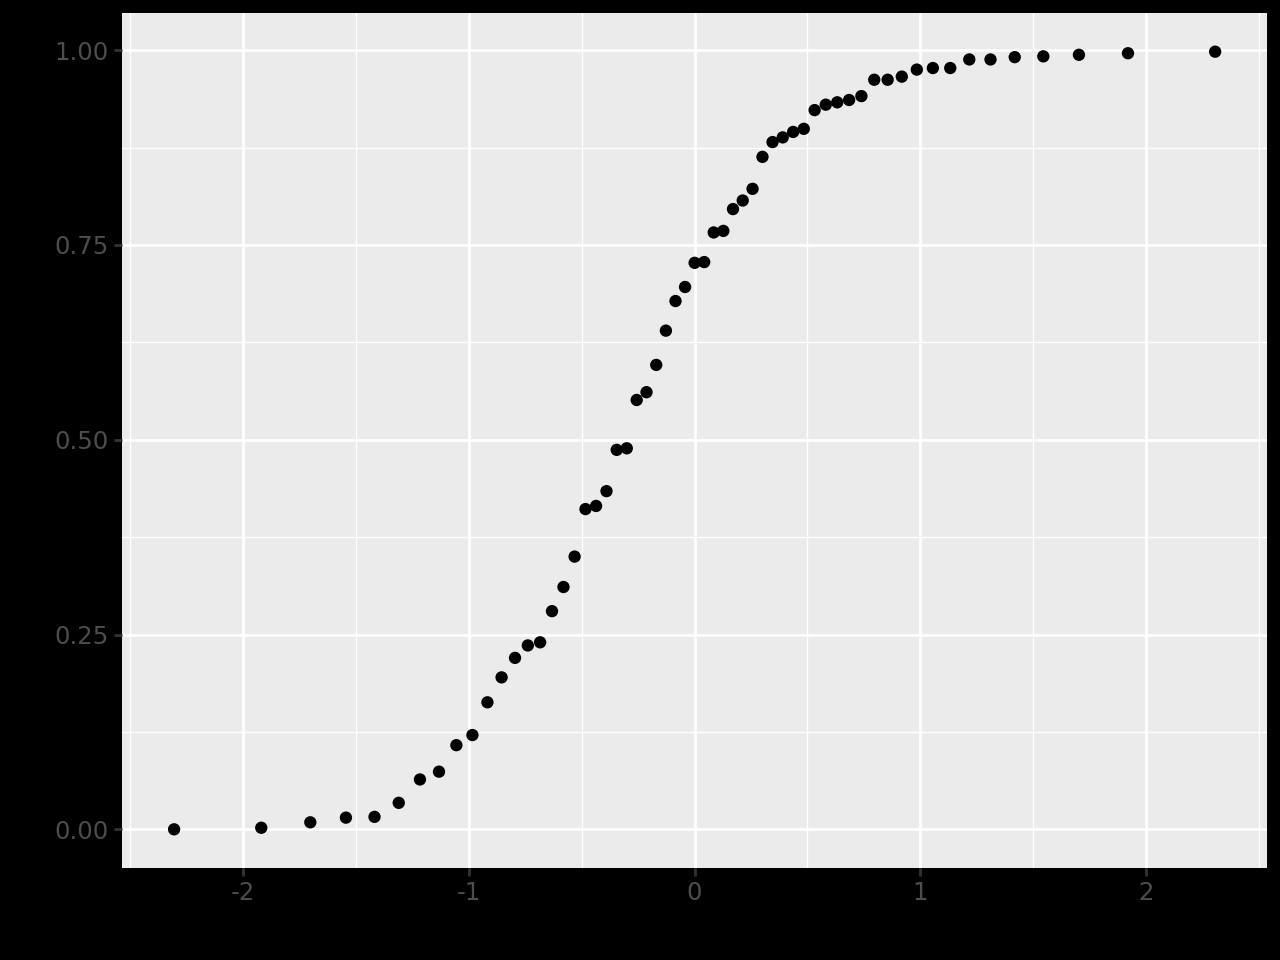

In [550]:
ggplot() \
+ aes(sample=bdays_prob) \
+ geom_qq()

In [553]:
# histogram
probs = []
for i in range(100):
    probs.append(simulate_bday(1000))
probs

[0.974,
 0.97,
 0.96,
 0.971,
 0.974,
 0.974,
 0.969,
 0.969,
 0.967,
 0.962,
 0.968,
 0.98,
 0.973,
 0.966,
 0.967,
 0.971,
 0.972,
 0.954,
 0.969,
 0.964,
 0.979,
 0.974,
 0.974,
 0.971,
 0.967,
 0.966,
 0.963,
 0.972,
 0.97,
 0.971,
 0.976,
 0.973,
 0.98,
 0.972,
 0.978,
 0.968,
 0.97,
 0.963,
 0.973,
 0.968,
 0.977,
 0.97,
 0.961,
 0.968,
 0.968,
 0.975,
 0.964,
 0.973,
 0.974,
 0.974,
 0.969,
 0.978,
 0.967,
 0.972,
 0.971,
 0.97,
 0.973,
 0.977,
 0.956,
 0.968,
 0.974,
 0.964,
 0.972,
 0.959,
 0.976,
 0.965,
 0.977,
 0.973,
 0.972,
 0.97,
 0.973,
 0.982,
 0.962,
 0.97,
 0.973,
 0.972,
 0.971,
 0.98,
 0.967,
 0.967,
 0.969,
 0.972,
 0.968,
 0.976,
 0.967,
 0.966,
 0.975,
 0.968,
 0.972,
 0.974,
 0.967,
 0.973,
 0.976,
 0.969,
 0.967,
 0.97,
 0.969,
 0.969,
 0.97,
 0.968]

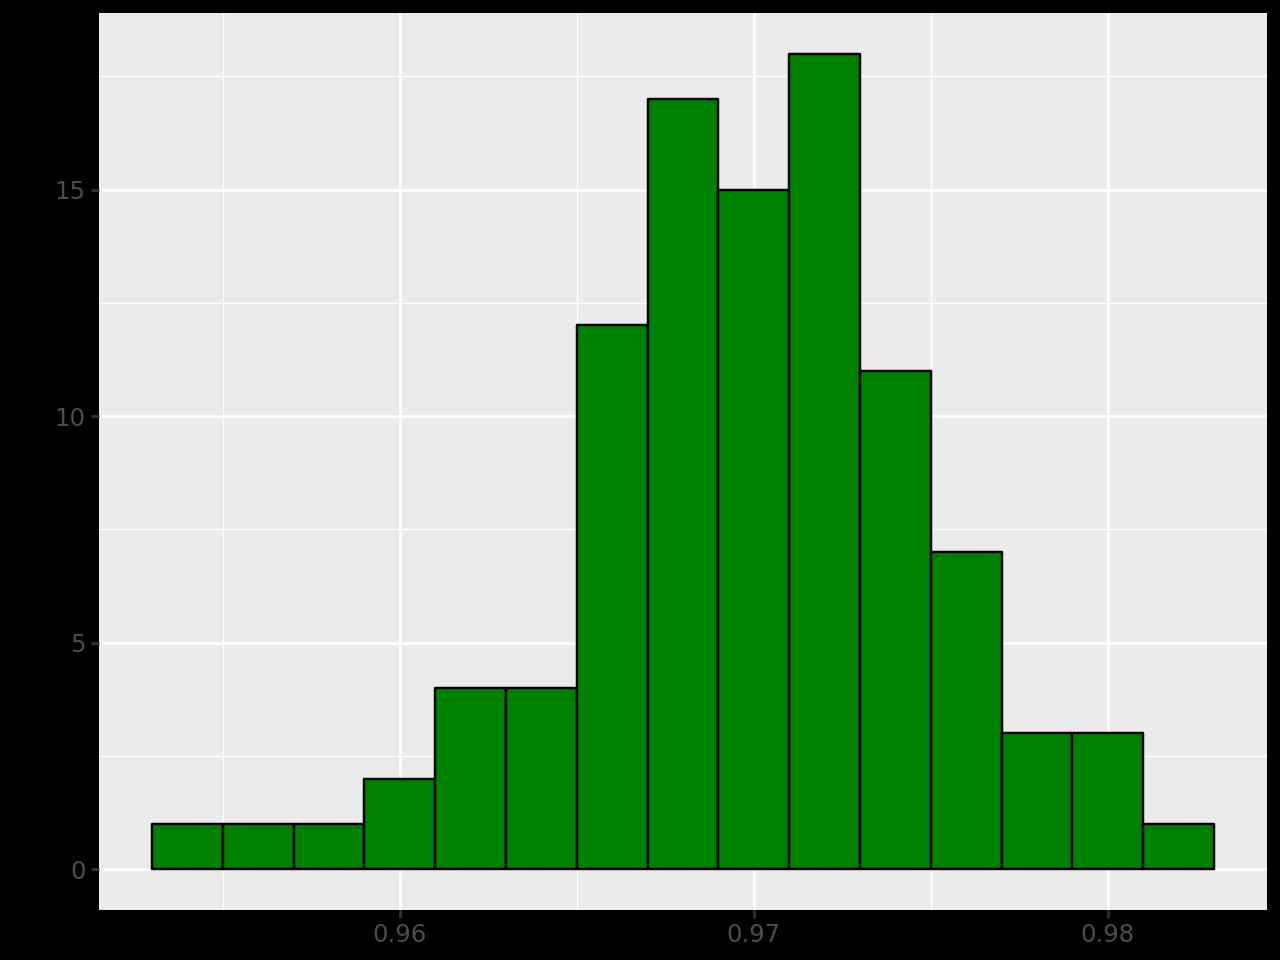

In [561]:
ggplot() \
+ aes(x=probs) \
+ geom_histogram(binwidth=0.002, fill="green", color="black")

In [572]:
# mouty hall
stick = []
switch = []
for i in range(1000):
    stick.append(simulate_strategy("stick", 100))
    switch.append(simulate_strategy("switch", 100))


In [588]:
stick_df = pd.DataFrame(stick)
stick_df["strategy"] = np.repeat("stick", len(stick))
stick_df

switch_df = pd.DataFrame(switch)
switch_df["strategy"] = np.repeat("switch", len(switch))
switch_df

concat = pd.concat([stick_df,switch_df])
concat

,0,strategy
0,0.38,stick
1,0.29,stick
2,0.35,stick
3,0.23,stick
4,0.34,stick
...,...,...
995,0.71,switch
996,0.67,switch
997,0.80,switch
998,0.64,switch


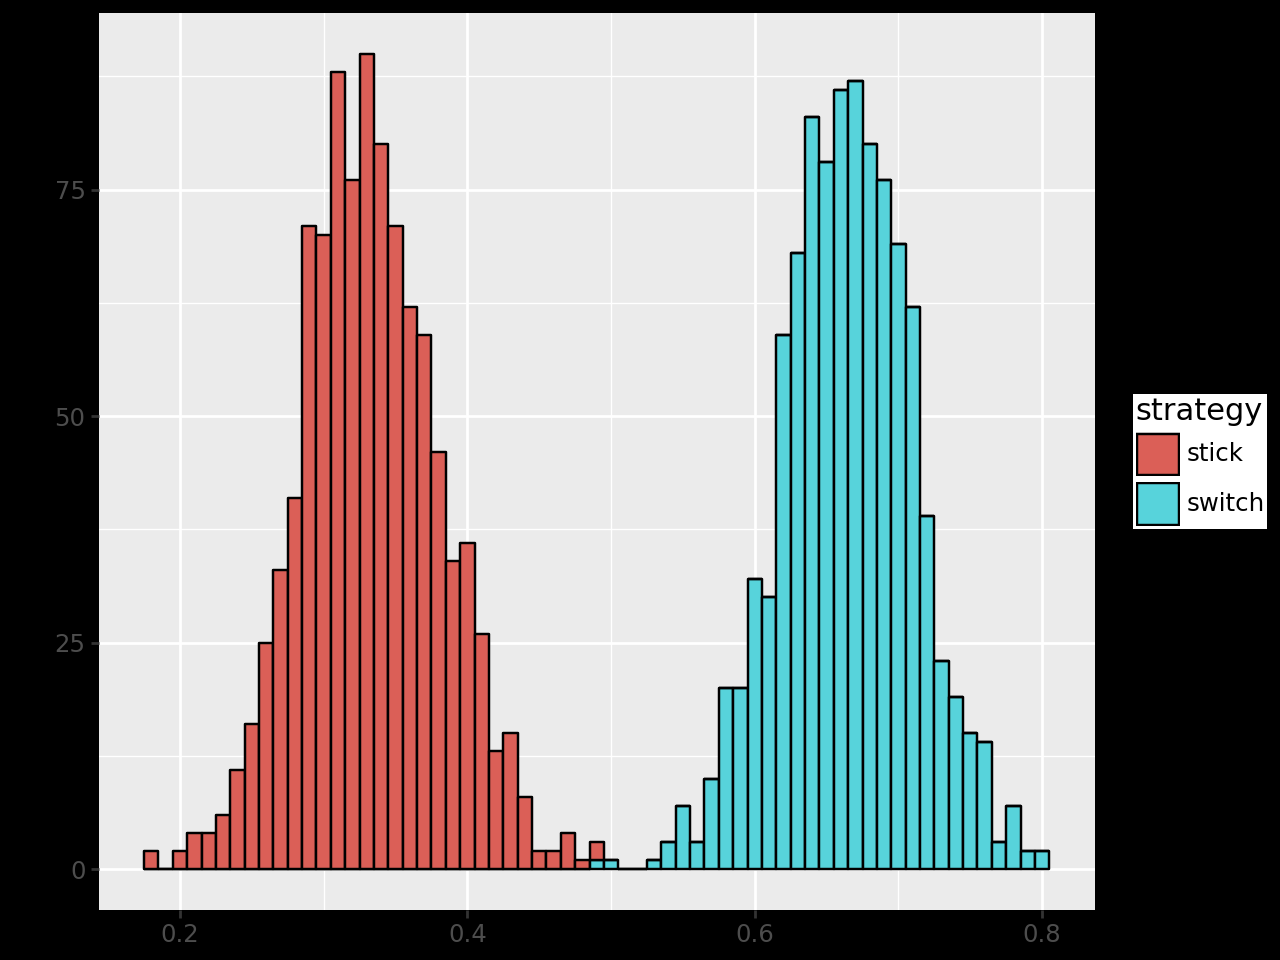

In [602]:
ggplot(concat) \
+ aes(x=concat[0], fill="strategy") \
+ geom_histogram(binwidth=0.01, color="black")

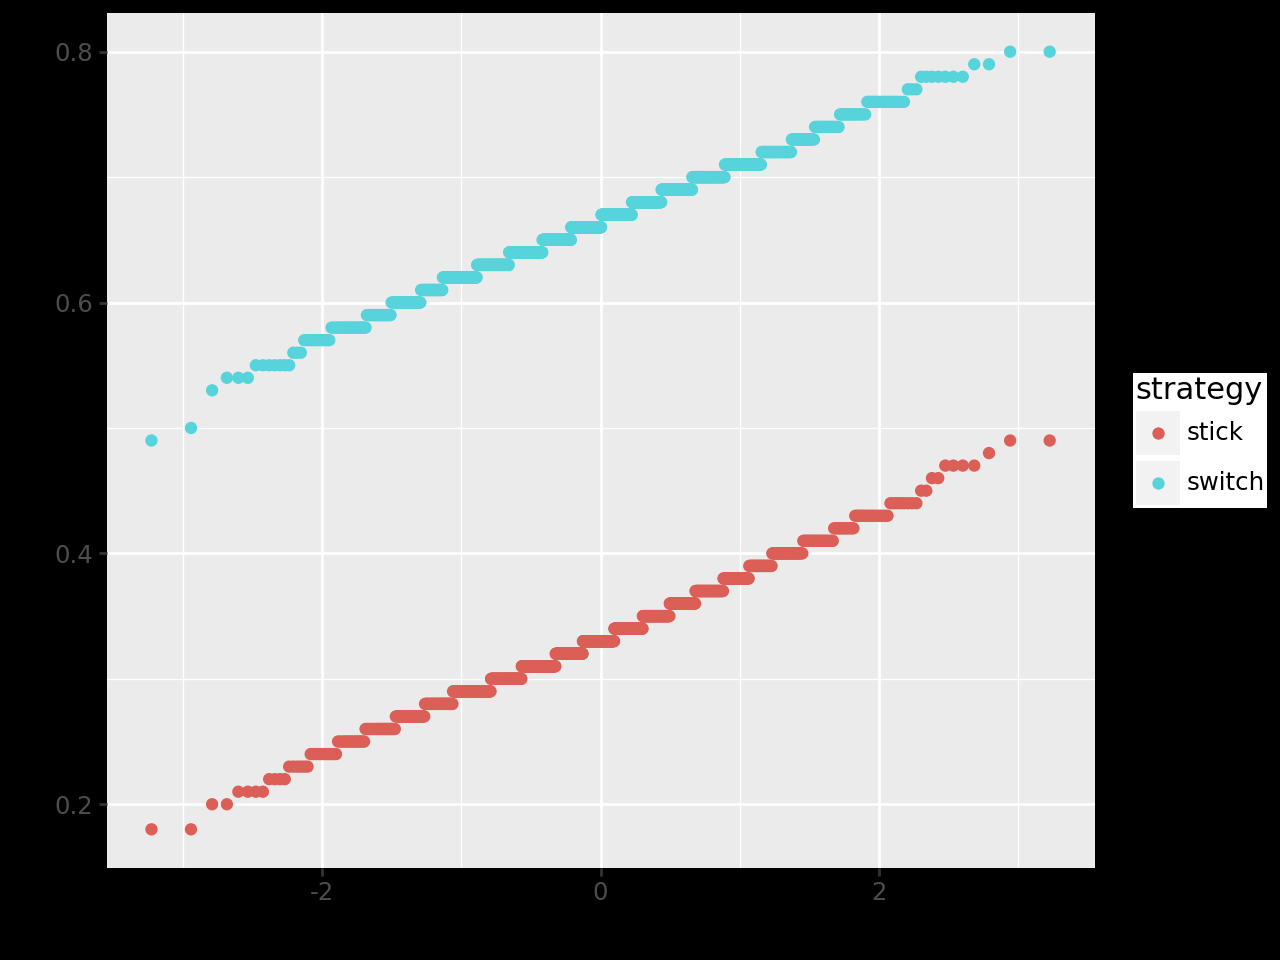

In [607]:
ggplot(concat) \
+ aes(sample=concat[0], color="strategy") \
+ geom_qq()